# Bank Customer Churn Prediction

It is much more expensive to market to and sign in a new client than to keep an existing one. This makes
churn preventions an important strategy and allows companies to devlop campains to retain clients and 
promote loyalty. This classification project's goal is to model churn probability based on the following customers features:

* Surname         
* CreditScore        
* Geography         
* Gender          
* Age              
* Tenure           
* Balance         
* NumOfProducts      
* HasCrCard         
* IsActiveMember    
* EstimatedSalary



### Contents:
1. Set up Environment
2. Data set
3. Data Cleaning
4. Modeling
5. Testing Model 

## Set up Environment

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data set

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PRIYANG-BHATT/Datasets-Youtube-Pandas/main/DS/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.shape

(10000, 14)

In [7]:
print(f"Number of rows {data.shape[0]}")
print(f"Number of columns {data.shape[1]}")

Number of rows 10000
Number of columns 14


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [165]:
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


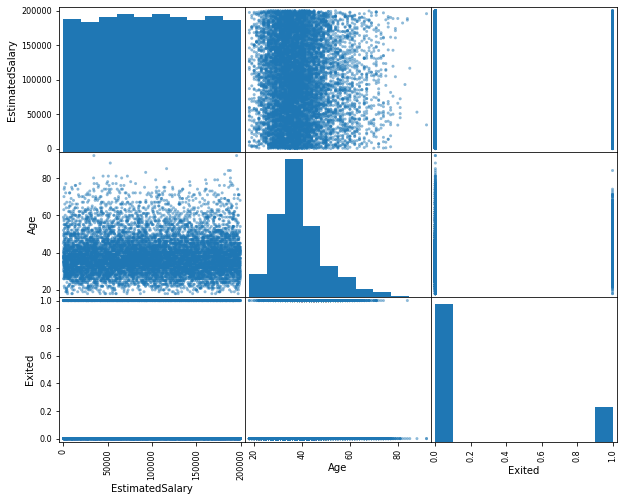

In [171]:
from pandas.plotting import scatter_matrix
attributes = ["EstimatedSalary", "Age", "Exited"] #choose columns
scatter_matrix(data[attributes],
              figsize=(10, 8))
plt.show()

## Data Cleaning

In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data.drop(["RowNumber", "CustomerId", "Surname"], axis= 1, inplace=True)

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Data

In [13]:
# Turn object attributes into categories

for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [15]:
# Turn categorical variables into numerical
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes+1

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.8 KB


In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,3,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,3,1,43,2,125510.82,1,1,1,79084.10,0


## Analysis of Target variable

In [18]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

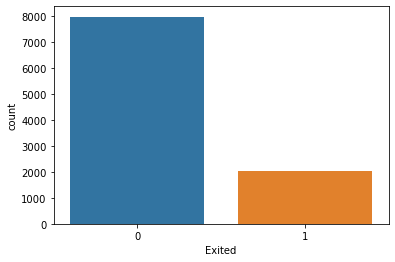

In [19]:
sns.countplot(data["Exited"])

## Handling Imbalanced Data with SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

In [59]:
X_res, y_res= SMOTE().fit_resample(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

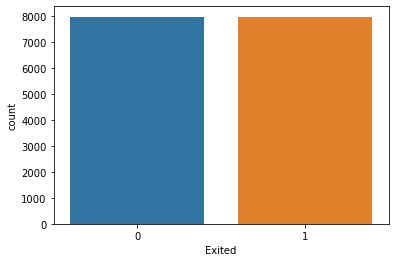

In [57]:
sns.countplot(y_res)

## Modeling

In [20]:
#Split X/y

X = data.drop("Exited", axis=1)
y= data["Exited"]

In [61]:
# Split train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=.8, random_state=42)

### Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
X_train[:5]

array([[-0.40582204,  0.42843643, -0.83735399,  0.30063305,  0.79822945,
         0.46347197, -0.73463261, -1.28786555,  1.30681204,  1.08423582],
       [ 1.09186301, -0.8944623 ,  1.19423806,  0.10024772, -1.40604998,
         0.77465293,  1.01606314, -1.28786555,  1.30681204,  0.74962185],
       [-1.70673095,  0.42843643, -0.83735399,  1.30255972,  0.43084954,
         0.72531145, -0.73463261, -1.28786555, -0.76522099, -0.85511601],
       [ 0.09705031,  0.42843643, -0.83735399,  1.40275239,  1.16560935,
         0.60366931, -0.73463261, -1.28786555,  1.30681204,  0.32839377],
       [ 0.0751863 , -0.8944623 , -0.83735399,  0.50101839,  0.06346964,
         0.50669989,  1.01606314,  0.77647857,  1.30681204,  0.66765412]])

In [64]:
X_test[:5]

array([[-1.2383183 , -0.88396461, -0.83293451, -1.18029099,  0.03025261,
        -1.31513464,  0.91681875, -1.33420565,  1.29946435, -0.80353828],
       [-0.46034418,  0.44448409, -0.83293451,  0.00356097, -0.33484134,
         0.83216501, -0.75422503,  0.74950964, -0.76954785,  0.96638587],
       [ 0.3505021 ,  1.7729328 , -0.83293451, -0.98298233,  1.4906284 ,
         0.62426962,  0.91681875,  0.74950964,  1.29946435,  0.02251568],
       [ 0.82166953, -0.88396461, -0.83293451,  0.79279561,  1.4906284 ,
         0.91894607, -0.75422503, -1.33420565,  1.29946435, -1.64392145],
       [ 0.41624639,  0.44448409, -0.83293451, -0.19374769, -0.33484134,
         1.23778355,  0.91681875,  0.74950964, -0.76954785,  1.07459796]])

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#fit model
lr.fit(X_train, y_train)

LogisticRegression()

In [66]:
#prediction
y_pred1 = lr.predict(X_test)

In [67]:
#score model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

accuracy_score(y_test, y_pred1)

0.7686754551161331

In [68]:
precision_score(y_test, y_pred1)

0.7506142506142506

In [69]:
recall_score(y_test, y_pred1)

0.7868641339343206

In [70]:
f1_score(y_test, y_pred1)

0.7683118516189876

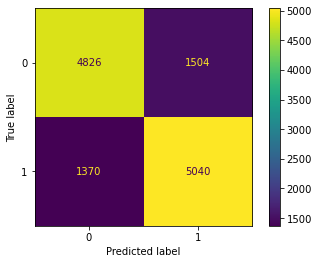

In [71]:
plot_confusion_matrix(lr, X_train, y_train)

# SVC

In [73]:
from sklearn import svm

In [74]:
svm = svm.SVC()


In [75]:
# fit model
svm.fit(X_train, y_train)

SVC()

In [76]:
# prediction
y_pred2 = svm.predict(X_test)

In [77]:
# Score model
accuracy_score(y_test, y_pred2)

0.8405524168236033

In [79]:
precision_score(y_test, y_pred2)

0.8317460317460318

# KNeighborsClassifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [81]:
#fit model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
#Predict
y_pred3 = knn.predict(X_test)

In [83]:
#Score model
accuracy_score(y_test, y_pred3)

0.8298807281858129

In [84]:
precision_score(y_test, y_pred3)

0.8091743119266055

# Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt = DecisionTreeClassifier()
#fit model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
# Predict
y_pred4 = dt.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred4)

0.8097928436911488

In [90]:
precision_score(y_test, y_pred4)

0.8002536461636017

# RandomForest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [92]:
#fit model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
# Predict
y_pred5 = rf.predict(X_test)

In [94]:
#Score
accuracy_score(y_test, y_pred5)

0.8565599497802887

In [95]:
precision_score(y_test, y_pred5)

0.8429286608260326

# Gradient Boosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [97]:
# train model
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [98]:
# Predict
y_pred6 = gb.predict(X_test)

In [99]:
# Score
accuracy_score(y_test, y_pred6)

0.8411801632140615

In [100]:
precision_score(y_test, y_pred6)

0.8273921200750469

### Visualize Scores

In [116]:
acc_scores = pd.DataFrame({"Model": ["LR","SVC","KNN","DT","RF","GBC"],
                          "ACC":[accuracy_score(y_test, y_pred1),
                                accuracy_score(y_test, y_pred2),
                                accuracy_score(y_test, y_pred3),
                                accuracy_score(y_test, y_pred4),
                                accuracy_score(y_test, y_pred5),
                                accuracy_score(y_test, y_pred6)]})

In [117]:
acc_scores.sort_values(by="ACC", ascending= False)

,Model,ACC
4,RF,0.856560
5,GBC,0.841180
1,SVC,0.840552
2,KNN,0.829881
3,DT,0.809793
0,LR,0.768675


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='ACC'>

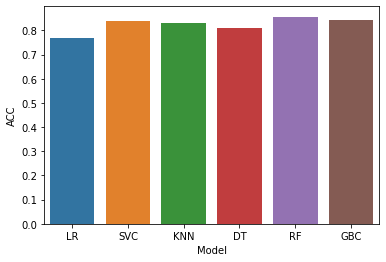

In [115]:
sns.barplot(acc_scores["Model"], acc_scores["ACC"])

In [118]:
pre_scores = pd.DataFrame({"Model": ["LR","SVC","KNN","DT","RF","GBC"],
                          "Pre":[precision_score(y_test, y_pred1),
                                precision_score(y_test, y_pred2),
                                precision_score(y_test, y_pred3),
                                precision_score(y_test, y_pred4),
                                precision_score(y_test, y_pred5),
                                precision_score(y_test, y_pred6)]})

In [123]:
pre_scores.sort_values(by="Pre", ascending=False)

,Model,Pre
4,RF,0.842929
1,SVC,0.831746
5,GBC,0.827392
2,KNN,0.809174
3,DT,0.800254
0,LR,0.750614


<AxesSubplot:xlabel='Model', ylabel='Pre'>

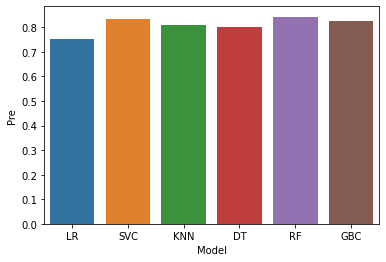

In [120]:
sns.barplot(x=pre_scores["Model"], y=pre_scores["Pre"])

# Testing Model

In [122]:
X_res = scaler.fit_transform(X_res)

In [124]:
#train model on entire dataset
rf.fit(X_res, y_res)

RandomForestClassifier()

In [125]:
import joblib

In [126]:
joblib.dump(rf,"bank_churn_predict")

['bank_churn_predict']

In [127]:
# load model
model = joblib.load("bank_churn_predict")

In [175]:
# Predict church rate of a customer with following characteristics
x = pd.DataFrame({"CreditScore": 619,
                "Geography": 3,
                "Gender":0,
                "Age": 18,
                "Tenure":2,
                "Balance":0.0,
                "NumOfProducts":0,
                "HasCrCard":0,
                "IsActiveMember":0,
                "EstimatedSalary":50000
                }, index=[np.arange(1)])

In [176]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,3,0,18,2,0.0,0,0,0,50000


In [177]:
model.predict_proba(x)

array([[0.54, 0.46]])